In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

[INFO]Creating Heatmap..
Saving: outputs/Patch/Before Adversarial Training/model-epoch-17.pth/spot-meanlogit-paper.png
Saving: outputs/Patch/Before Adversarial Training/model-epoch-17.pth/spot-meanprobability-paper.png
Saving: outputs/Patch/Before Adversarial Training/model-epoch-17.pth/spot-count-paper.png
Saving: outputs/Patch/Before Adversarial Training/model-epoch-17.pth/spot-mse-paper.png
Saving: outputs/Patch/Before Adversarial Training/model-epoch-17.pth/hline-meanlogit-paper.png
Saving: outputs/Patch/Before Adversarial Training/model-epoch-17.pth/hline-meanprobability-paper.png
Saving: outputs/Patch/Before Adversarial Training/model-epoch-17.pth/hline-count-paper.png
Saving: outputs/Patch/Before Adversarial Training/model-epoch-17.pth/hline-mse-paper.png
Saving: outputs/Patch/Before Adversarial Training/model-epoch-17.pth/vline-meanlogit-paper.png
Saving: outputs/Patch/Before Adversarial Training/model-epoch-17.pth/vline-meanprobability-paper.png
Saving: outputs/Patch/Before Ad

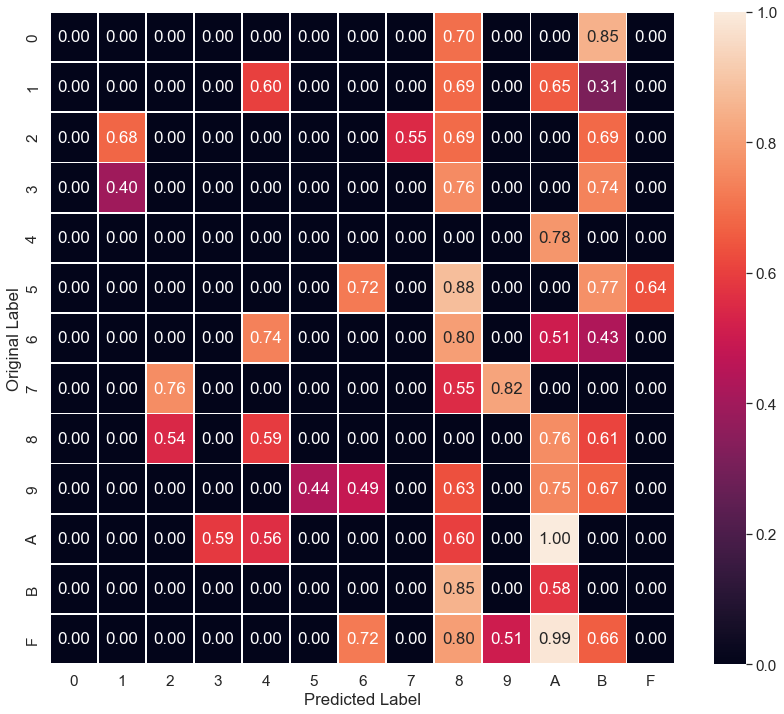

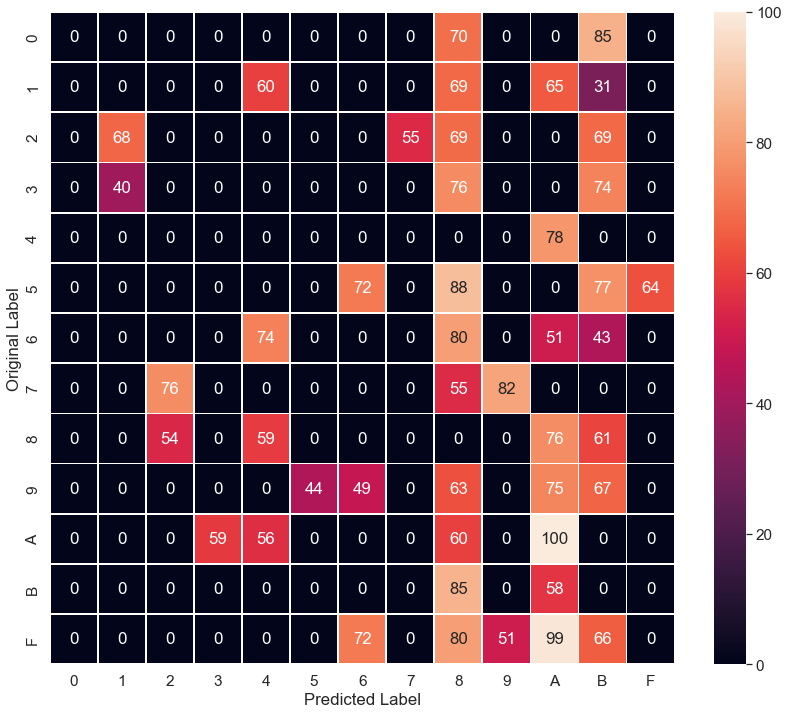

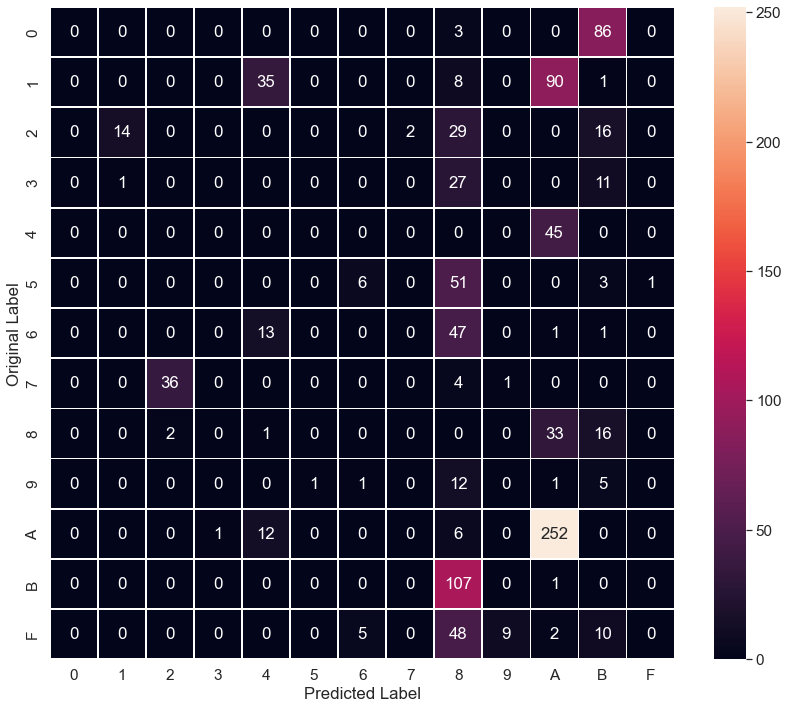

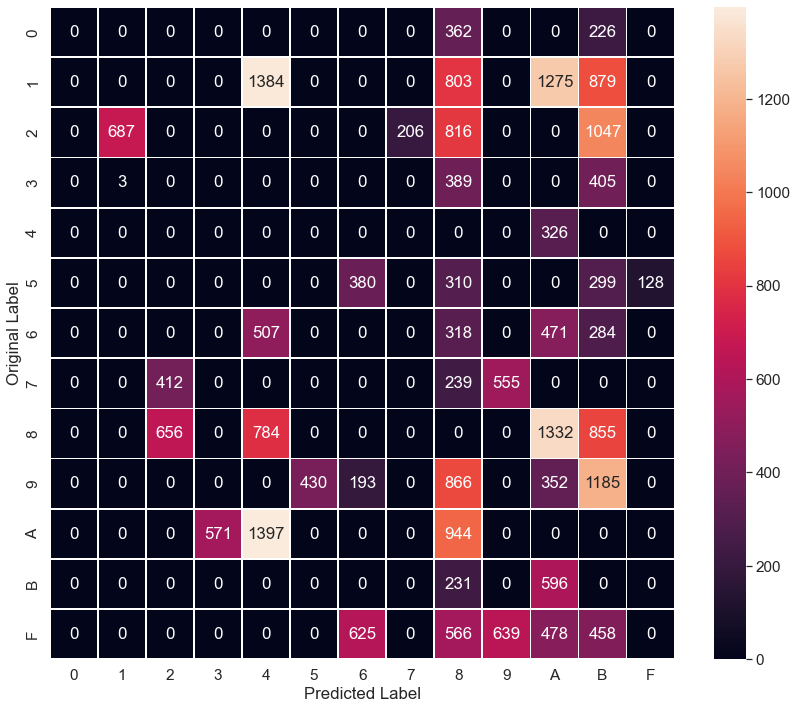

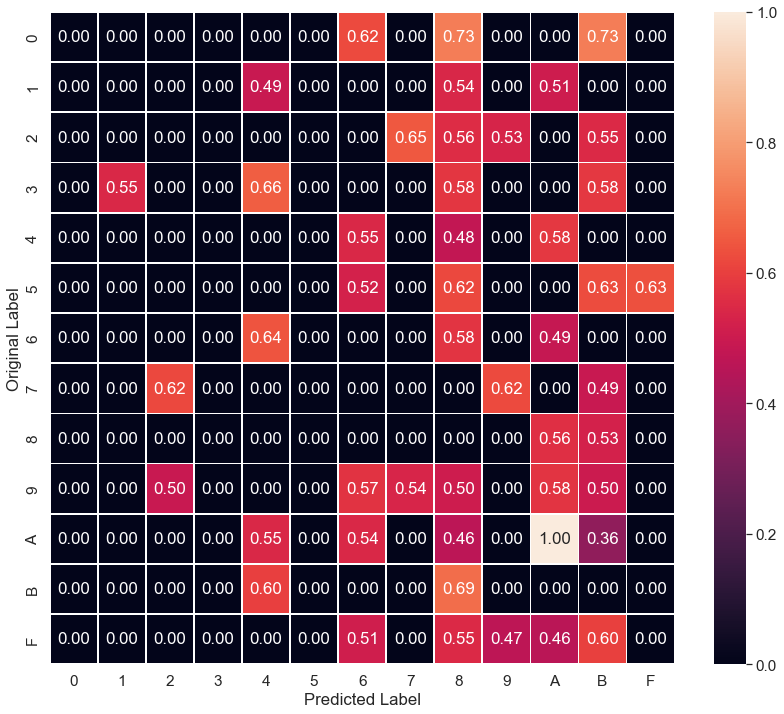

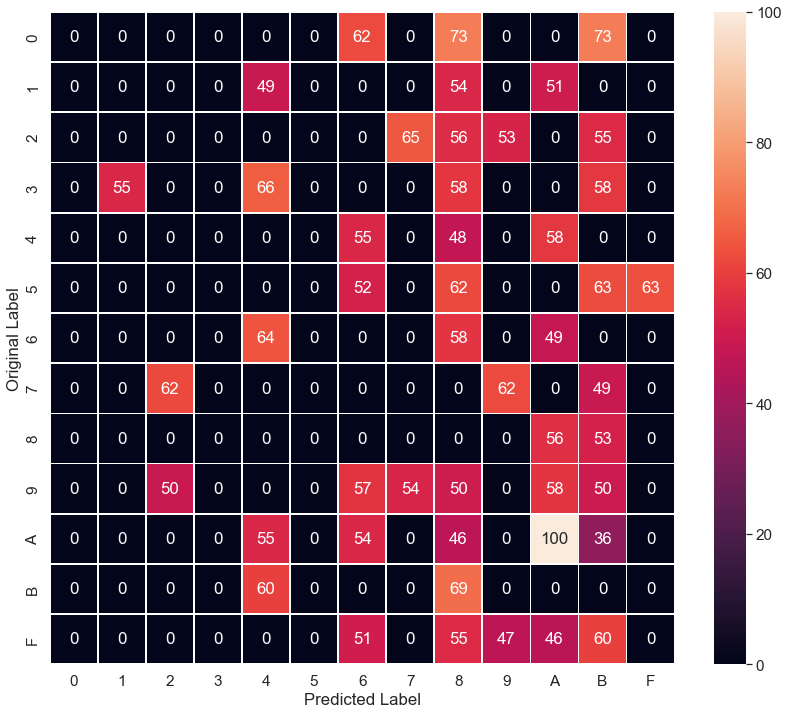

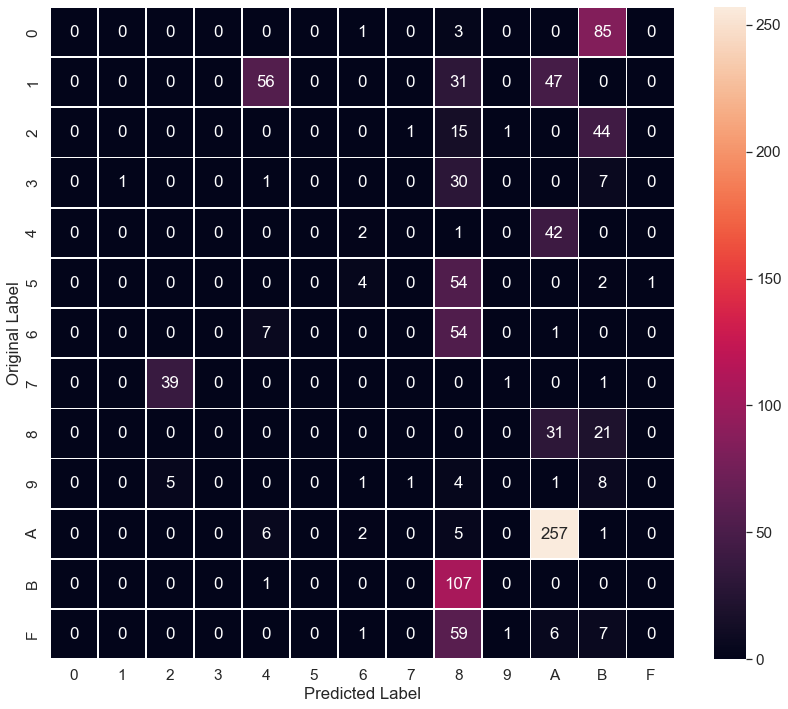

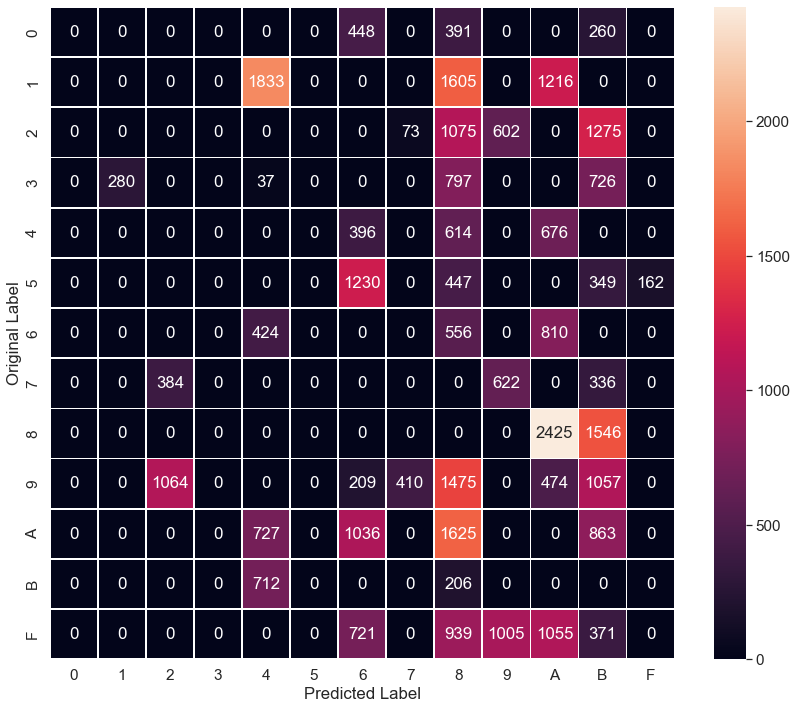

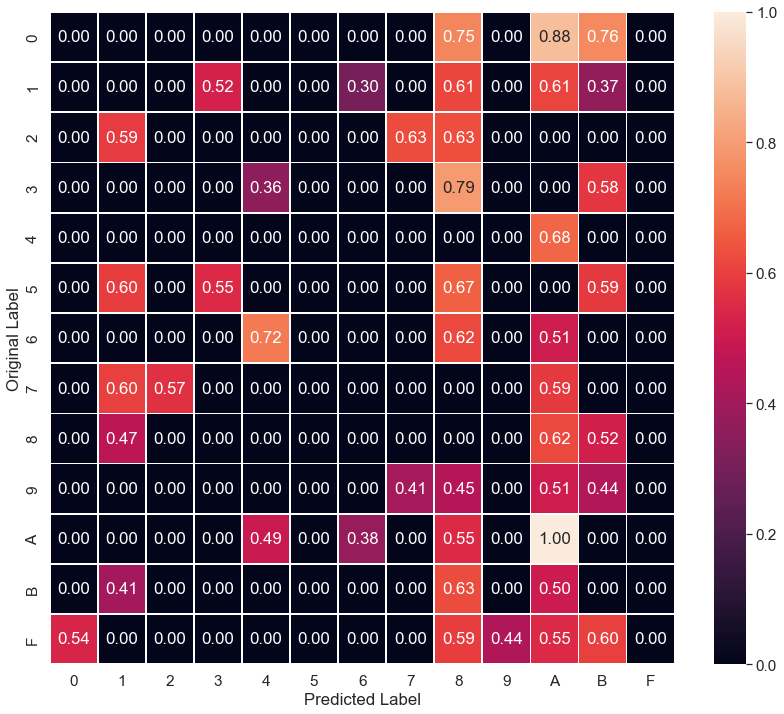

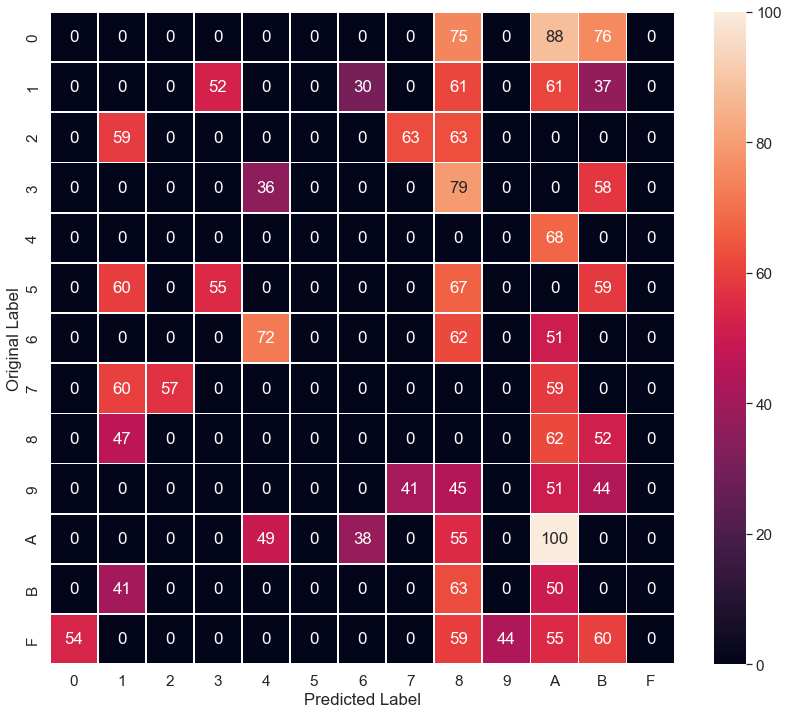

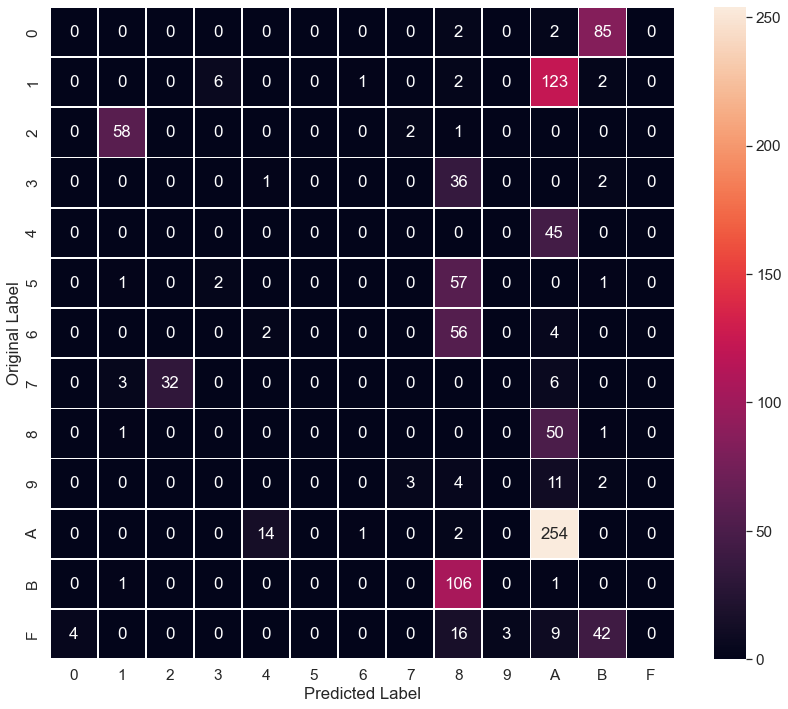

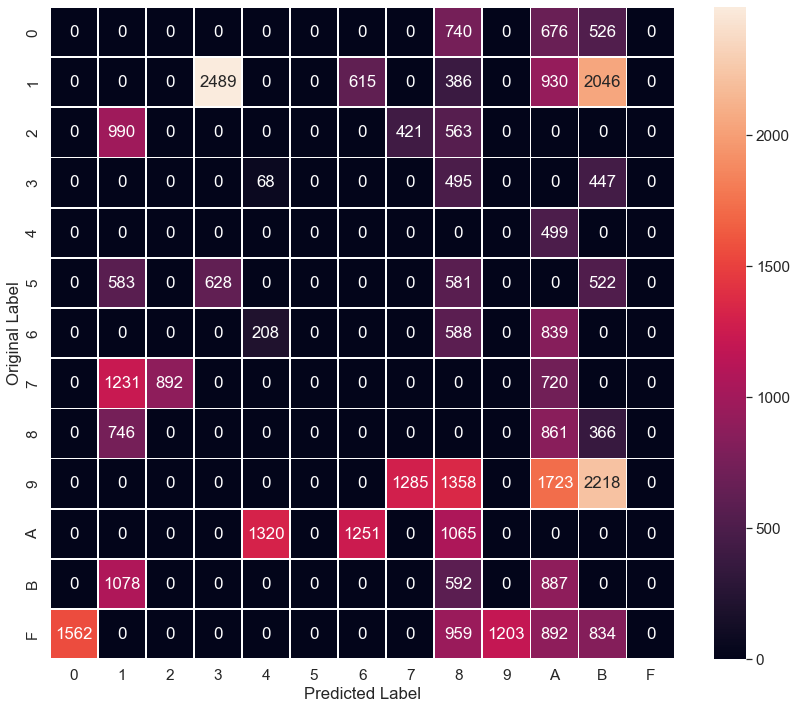

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

mode = ['spot', 'hline', 'vline']

print('[INFO]Creating Heatmap..')
model_path = 'models/checkpoints/25Jan/'
output_path = 'outputs/Patch/Before Adversarial Training'
for model_name in os.listdir(model_path):
    for mode_i in mode:
        file_name = ['meanlogit', 'meanprobability', 'count', 'mse']
        for file_name_i in file_name:
            df = pd.read_csv(
                f'{output_path}/{model_name}/{mode_i}-{file_name_i}.csv')
            plt.figure(figsize=[14, 12])
            sns.set(font_scale=1.4)
            if file_name_i == 'meanlogit':
                df = df.pivot('Original Label', 'Predicted Label', 'Mean Logit')
                sns.heatmap(df, linewidths=0.8, annot=True, fmt='.2f', vmin=0.0, vmax=1.0)
                # sns.heatmap(hline_meanlogit, linewidths=0.8, annot=True, cmap='RdBu', vmin=0.0, vmax=1.0)
            if file_name_i == 'meanprobability':
                df = df.pivot('Original Label', 'Predicted Label', 'Mean Probability')
                # df = df.astype('int')
                sns.heatmap(df, linewidths=0.8, annot=True, fmt='.0f', vmin=0.0, vmax=100.0)
            if file_name_i == 'count':
                df = df.pivot('Original Label', 'Predicted Label', 'Count')
                sns.heatmap(df, linewidths=0.8, annot=True, fmt='g')
            if file_name_i == 'mse':
                df = df.pivot('Original Label', 'Predicted Label', 'Average MSE')
                sns.heatmap(df, linewidths=0.8, annot=True, fmt='.0f')
                # sns.heatmap(df, linewidths=0.8, annot=True, fmt='.0f', annot_kws={"fontsize":12})

            print(f'Saving: {output_path}/{model_name}/{mode_i}-{file_name_i}-paper.png')
            plt.savefig(
                f'{output_path}/{model_name}/{mode_i}-{file_name_i}-paper.png', dpi=600, bbox_inches='tight', pad_inches=0.2)

print('[INFO]Done')
